In [1]:
from solver import Solver, Region
from numpy import random
import pickle
import os.path as path
import numpy as np 
from bioproc.proc_models import *   
from bioproc.proc_opt import *
from bioproc.hill_functions import *
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
import os.path 
from deap import creator, base, tools, algorithms  
import seaborn as sns

sns.set_style("white")

### Simulation params

In [2]:
dt = 0.001 
T = 160#192 #hours 
N = int(T/dt)    
ts = np.linspace(0, T, N)   


clk = get_clock(ts)

In [3]:
models = [one_bit_processor_ext, two_bit_processor_ext, three_bit_processor_ext]  
model = []

for model_index in range(3):     
    #folder = folders[model_index]        
    model.append(BioProc(np.array(["protein_production", "protein_production", "protein_production", "protein_production", "protein_degradation", "protein_degradation", "Kd","hill", "protein_production", "protein_degradation", "Kd", "hill"]), models[model_index]))
    #solver = Solver(model)    
   

-30
-20
-18


### Additional functions

In [4]:
init_valid = [np.array([0]*6),
              np.array([0]*12),  
              np.array([0]*18)]


def plot_points(axes, points, n_bits = 2, plot_clock=True, plot_q = False, hot_start = True):
    
    for i, (a,p) in enumerate(zip(axes, points)):
       
        params_ff = p[0:8]        
        params_addr = p[8:]  
        
    
        
        if n_bits == 1 or (n_bits == 0 and i == 0):
            
            y0 = init_valid[0]# np.array([0]*6)  
            if hot_start:
                
                for i in range(3):                    
                    ts_small = ts[ts < 5]
                    Y = odeint(one_bit_processor_ext, y0, ts_small, args=(params_ff, params_addr))                     
                    init_valid[0] = Y[-1,:].flatten()
                    y0 = init_valid[0]# np.array([0]*6)  
            
            Y = odeint(one_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
            
            
            
            
            i1 = Y[:,-2]         
            i2 = Y[:,-1]        
            
            q = Y[:,2]       
            

            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            if plot_q:
                a.plot(ts, q, label='q') 
            if plot_clock:
                a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
            a.set_xlabel("time [h]")
            a.legend(loc='upper left')       
            
            
        elif n_bits == 2 or (n_bits == 0 and i == 1):
            y0 = init_valid[1]# np.array([0]*6)  
            
            if hot_start:                
                for i in range(3):                    
                    ts_small = ts[ts < 5]
                    Y = odeint(two_bit_processor_ext, y0, ts_small, args=(params_ff, params_addr))                     
                    init_valid[1] = Y[-1,:].flatten()
                    y0 = init_valid[1]# np.array([0]*6)  
            
            Y = odeint(two_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
            
            init_valid[1] = Y[np.abs(ts - 10) <0.0001,:].flatten()
        
            i1 = Y[:,-4]         
            i2 = Y[:,-3]        
            i3 = Y[:,-2]  
            i4 = Y[:,-1]   

            q1 = Y[:,2]       
            q2 = Y[:,6]        


            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            a.plot(ts, i3, label='i3')
            a.plot(ts, i4, label='i4')
            if plot_q:
                a.plot(ts, q1, label='q1') 
                a.plot(ts, q2, label='q2') 
            if plot_clock:
                a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
            a.set_xlabel("time [h]")
            a.legend(loc='upper left')       
        elif n_bits == 3 or (n_bits == 0 and i == 2):
            y0 = init_valid[2]# np.array([0]*6)  
            
            if hot_start:                
                for i in range(3):                    
                    ts_small = ts[ts < 5]
                    Y = odeint(three_bit_processor_ext, y0, ts_small, args=(params_ff, params_addr))                     
                    init_valid[2] = Y[-1,:].flatten()
                    y0 = init_valid[2]# np.array([0]*6)  
                        
            Y = odeint(three_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
            init_valid[2] = Y[np.abs(ts - 10) <0.0001,:].flatten()
        
            i1 = Y[:,-6]         
            i2 = Y[:,-5]        
            i3 = Y[:,-4]  
            i4 = Y[:,-3]   
            i5 = Y[:,-2]   
            i6 = Y[:,-1]   
            
            q1 = Y[:,2]       
            q2 = Y[:,6]        
            q3 = Y[:,10]


            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            a.plot(ts, i3, label='i3')
            a.plot(ts, i4, label='i4')
            a.plot(ts, i5, label='i5')
            a.plot(ts, i6, label='i6')
            if plot_q:
                a.plot(ts, q1, label='q1') 
                a.plot(ts, q2, label='q2') 
                a.plot(ts, q3, label='q3') 
            if plot_clock:
                a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
            a.set_xlabel("time [h]")
            a.legend(loc='upper left')       
        
            
            
    axes[0].set_ylabel("Concetrations")
    plt.gcf().set_size_inches(15,5)
    plt.savefig('figs\\proc_'+str(n_bits)+'_ODE.pdf', bbox_inches = 'tight')
    plt.show()
    np.savetxt('figs\\proc_'+str(n_bits)+'.txt', points)
        
        
    

# Plot predefined points

In [5]:
points1 = np.array([[16.7142123, 41.35777581, 25.62004154, 50., 3.45308182, 0.72021256, 7.06910448, 5., 50., 0.58038232, 4.72963337, 2.09047277],
                    [44.75796038, 44.56125843, 22.1113692, 50., 1.49609519, 0.72021256, 6.67402739, 5., 50., 0.58038232, 6.17340269, 1.72638342],
                    [35.58227778, 41.35777581, 16.93207762, 40.92107467, 2.64058623, 0.66017822, 9.62045586, 3.81639044, 45.90182014, 0.58038232, 1.33511836, 1.52108708]])
points2 = np.array([[19.76090113,41.15629781,17.93892382,50.,3.06945198,0.6348498,8.48221145,5.,50.,0.55229533,19.4448549,5.,],
                    [24.54900936,41.15629781,22.25923667,50.,2.52717827,0.6348498,5.78301014,5.,50.,0.55229533,19.4448549,5.,],
                    [19.01312141,50.,15.69457423,50.,1.99090873,0.6749633,8.39132541,5.,50.,0.54571671,27.44382786,5.,]])
points3 = np.array([[15.61036177,32.61999927,33.65461794,3.44471276,3.53604366,0.34430292,4.65728739,3.51555656,50.,0.59701916,4.68778842,2.56838898],
                    [14.35138363,41.23389618,31.70571365,6.22717818,4.45989656,0.34430292,5.99151922,5.,50.,0.52258935,3.79394175,2.56838898],
                    [15.61036177,50.,33.65461794,6.22717818,5.22054044,0.34430292,6.22917531,4.26980173,50.,0.55738533,7.40976,2.56838898]])

Points = np.array([points1, points2, points3])

-31.54498896458219
-27.20446346613681
-26.149705499595235


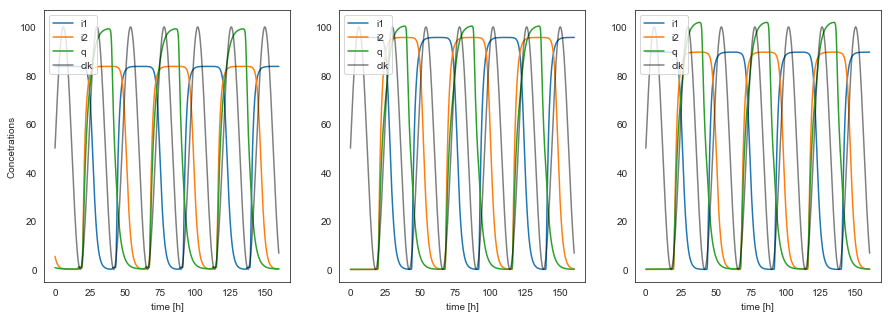

-21.345742889272092
-15.85629856168719
-17.504413843148562


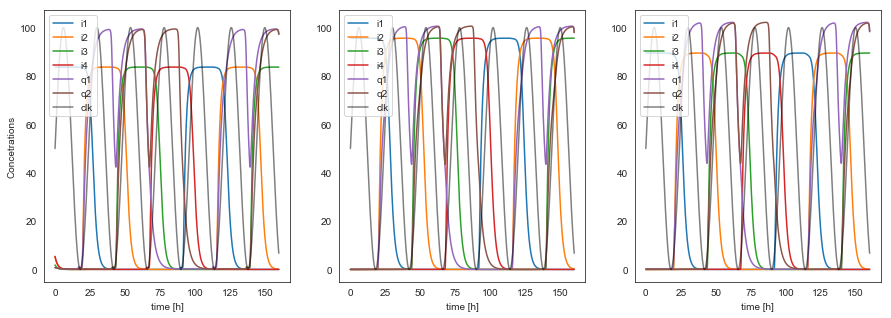

-18.90849104368726
-13.1607340056872
-15.408461743982109


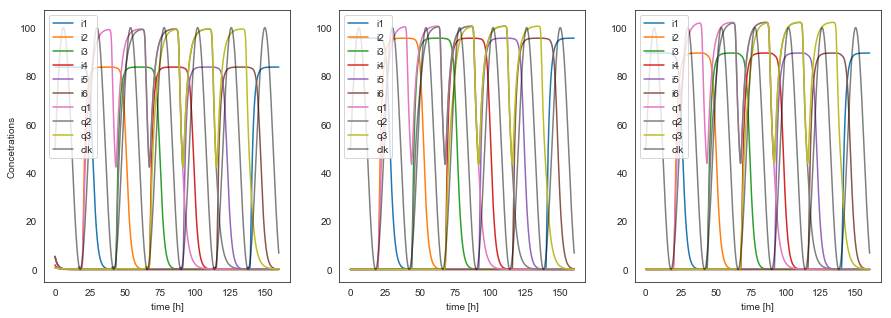

In [6]:
points = Points[2]

for n_bits in range(1,4):
    i = n_bits-1
    
    #points = Points[i]
    
    for j in range(3):
        m = model[i]
        m.eval(points[j])

    ax1=plt.subplot(1, 3, 1)
    ax2=plt.subplot(1, 3, 2, sharey = ax1)
    ax3=plt.subplot(1, 3, 3, sharey = ax1)
    plot_points([ax1, ax2, ax3], points[:3], n_bits=n_bits, plot_q=True)
    #plot_points([ax1], points[:1], n_bits=n_bits)

### Save initial state of the system

In [132]:
np.savetxt('init1bit.txt', init_valid[0])
np.savetxt('init2bit.txt', init_valid[1])
np.savetxt('init3bit.txt', init_valid[2])

# Read points from the results of optimization

In [10]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Candidate", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("candidate", Solver.generateCandidate) 

In [7]:
type(np.array([]))

numpy.ndarray

In [8]:
#folders = ["one_bit_model_new_new", "two_bit_model_new_new", "three_bit_model_new_new"]
folders = ["01_miha", "02_miha", "03_miha"]
#folders = ["01_lidija", "02_lidija", "03_lidija"]

In [9]:
file =  os.path.join(".", "bioproc", folders[0], "bioprocViableSet_IterGA.p")    
viablePoints1 = np.array(pickle.load(open(file, "rb")))     
number1 = np.size(viablePoints1, 0) 
rndPoints = np.array(np.random.randint(number1, size=20)) 
points1 = viablePoints1[rndPoints]

FileNotFoundError: [Errno 2] No such file or directory: '.\\bioproc\\one_bit_model_new_new\\bioprocViableSet_IterGA.p'

In [10]:
file =  os.path.join(".", "bioproc",  folders[1], "bioprocViableSet_IterGA.p")    
viablePoints2 = np.array(pickle.load(open(file, "rb")))     
number2 = np.size(viablePoints2, 0) 
rndPoints = np.array(np.random.randint(number2, size=20)) 
points2 = viablePoints2[rndPoints]

FileNotFoundError: [Errno 2] No such file or directory: '.\\bioproc\\two_bit_model_new_new\\bioprocViableSet_IterGA.p'

In [11]:
file =  os.path.join(".", "bioproc",  folders[2], "bioprocViableSet_IterGA.p")    
viablePoints3 = np.array(pickle.load(open(file, "rb")))     
number3 = np.size(viablePoints3, 0) 
rndPoints = np.array(np.random.randint(number3, size=20)) 
points3 = viablePoints3[rndPoints]

FileNotFoundError: [Errno 2] No such file or directory: '.\\bioproc\\three_bit_model_new_new\\bioprocViableSet_IterGA.p'

In [12]:
number = np.array([number1, number2, number3])
points = np.array([points1, points2, points3])
viablePoints = np.array([viablePoints1, viablePoints2, viablePoints3])

NameError: name 'number1' is not defined

## Plot feasible solutions for each topology
Make plots and save them to ```/figs``` folder together with the parameter values

In [4]:
plot_for_3 = True

if plot_for_3:
    rndPoints = np.array(np.random.randint(number[2], size=3)) 
    points = viablePoints[2][rndPoints]


NameError: name 'number' is not defined

-110.7236946339612
-23.401194676459088
-45.984722633983566


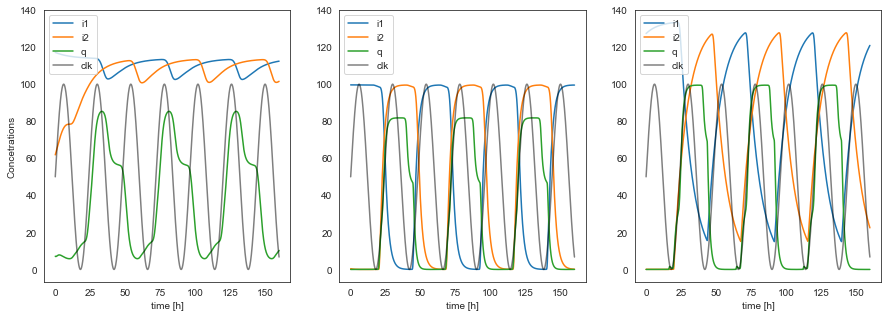

-36.2673720679166
-7.659687283211488
-12.54721049783431


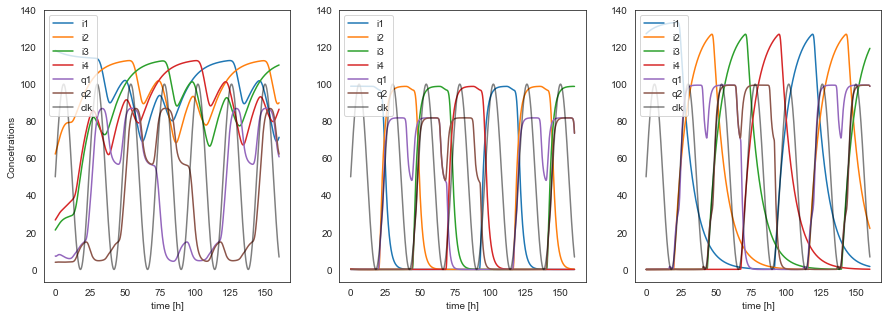

-21.71814882552982
-4.583814530729752
-8.272654345069611


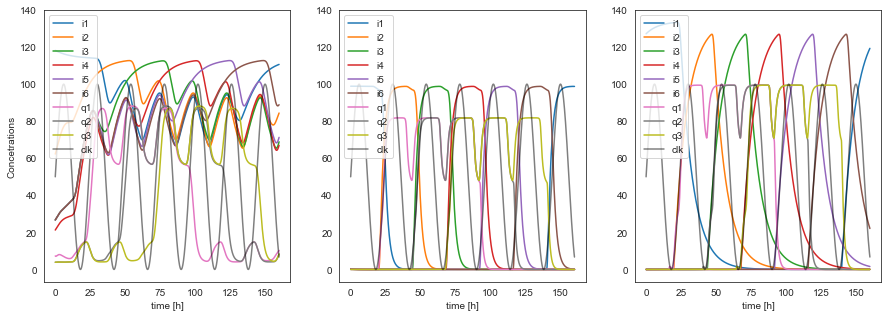

In [136]:
for n_bits in range(1,4): #[3]:
    i = n_bits-1
    
    if not plot_for_3:
        rndPoints = np.array(np.random.randint(number[i], size=3)) 
        points = viablePoints[i][rndPoints]
    
    #points = np.loadtxt('selected_points.txt')
    
    for j in range(3):
        m = model[i]
        m.eval(points[j])

    ax1=plt.subplot(1, 3, 1)
    ax2=plt.subplot(1, 3, 2, sharey = ax1)
    ax3=plt.subplot(1, 3, 3, sharey = ax1)
    plot_points([ax1, ax2, ax3], points[:3], n_bits=n_bits, plot_q = True)
    



-17.344850150567993
-11.70312264125111
-14.335274616788599


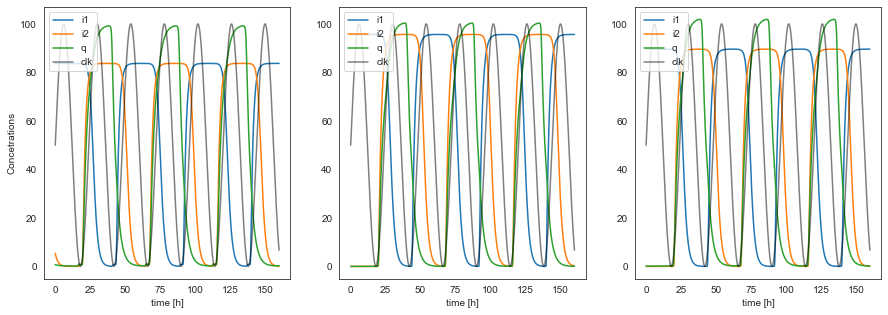

-15.80597843971167
-10.065166662712183
-12.911671762860788


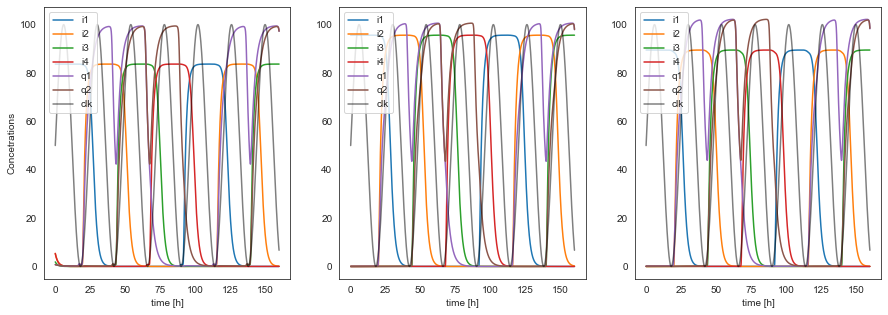

-15.321723224040248
-9.55807321792137
-12.444931136217129


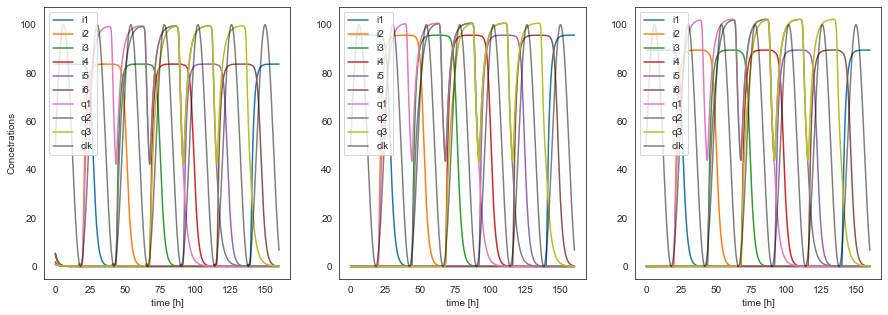

In [7]:
points = Points[2]

for n_bits in range(1,4):
    i = n_bits-1
    
    #points = Points[i]
    
    for j in range(3):
        m = model[i]
        m.eval(points[j])

    ax1=plt.subplot(1, 3, 1)
    ax2=plt.subplot(1, 3, 2, sharey = ax1)
    ax3=plt.subplot(1, 3, 3, sharey = ax1)
    plot_points([ax1, ax2, ax3], points[:3], n_bits=n_bits, plot_q=True)
    #plot_points([ax1], points[:1], n_bits=n_bits)

## Plot non-feasible solutions
Generate random solutions

In [36]:
parameter_values = {  "transcription": {"min": 0.01, "max": 50},   
                "translation": {"min": 0.01, "max": 50},  
                "protein_production": {"min": 0.1, "max": 50},           
                "rna_degradation": {"min": 0.1, "max": 100},        
                "protein_degradation": {"min": 0.001, "max": 50},         
                "hill": {"min": 1, "max": 5},         
                "Kd": {"min": 0.01, "max": 250}, 
                "protease_concentration": {"min": 10, "max":1000}
                }    
model = BioProc(parameter_values, np.array(["protein_production", "protein_production", "protein_production", "protein_production", "protein_degradation", "protein_degradation", "Kd","hill", "protein_production", "protein_degradation", "Kd", "hill"]), np.array([0]*12), avg_dev=50, fake_clock=True)               
solver = Solver(model)                      

-480000


C:\Users\miham\.conda\envs\opt\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\miham\.conda\envs\opt\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Candidate' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [39]:
points = np.array([]).reshape((0,12))
for i in range(3):
    points = np.vstack([points,np.array(solver.generateCandidate())])


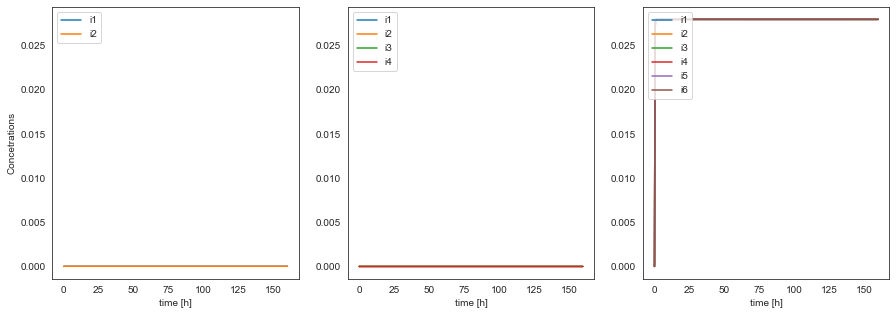

In [40]:
ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2, sharey = ax1)
ax3=plt.subplot(1, 3, 3, sharey = ax1)
plot_points([ax1, ax2, ax3], points[:3], n_bits=0, plot_clock=False)